# MonteCarlo Simulation

In this module we will work on creating monte carlo simulations of various Data Generating Processes.

To this end the module will be a skeleton of the exercises and you will fill in the code to finish the simulation.

In [1]:
clc; clear; clear all;

## Part I: A Simple Monte Carlo - Study of Sample Size

Here we will work on a simple example to fix ideas of what a MonteCarlo study is typically used for. 

For the exercise we will look at the effects of a sample size of 10, 100, 1000, and 10000. We will run the simulation 1000 times for each sample size (that is, within each loop we will run another loop to generate 1000 estimates of the beta parameters at the given sample size).

You will create the DGP of a process, and then simulate the process. You will generate the estimate of the regressor and of its standard error, along with some graphs to illustrate that over varying sample sizes we observe

\begin{equation}
\text{p}\lim_{n\rightarrow \infty} \left(\widehat{\beta} - \beta \right) = 0
\end{equation}

where $n$ is the sample size.

### Setting the random number generators to give the same values across runs

Set the random number generator to give the default starting value so that runs become reproducible. Recall that computerized random number generators are really pseudo-random, as they are by design created to allow for reproducibility, and generally depend on some sort of initial state to start the random generating sequence (some initial states might be: computer temperature, time settings, other current states of the computer).

In [2]:
rng('default')

### Our data generating process

Our initial data generating process will be simple. It will consist of just one regressor (independent variable). The DGP of our dependent variable $y$ is defined by the following:

\begin{align}
y_{i} &= \overbrace{15.5}^{\beta_{0}} + \overbrace{2.45}^{\beta_{1}}\cdot x_{1,i} + \varepsilon_{i} \\
x_{1,i} &\sim \text{i.i.d. } \mathcal{U}(0,3)\\
\varepsilon_{i}&\mid x_{1,i} \sim \text{i.i.d. }\mathcal{N}(0,1)
\end{align}

The above implies that the "population" parameters are
\begin{equation}
\beta = 
\begin{bmatrix}
15.5 \\
2.45
\end{bmatrix}
\end{equation}


### The monte-carlo simulation

We will run this in a loop that does the MC simulation and collects the relevent data (our estimates of the parameters) into a pre-initialized array - Matlab and many other programming languages like and prefer that arrays are pre-allocated with some value, typically 0 or NaN (Not a Number), to set memory.

In [3]:
%This cell initializes the arrays and the parameters 
%of the simulation

%Vector of sample sizes:
N = [10;100;1000;10000];

%Set iterator for simulator loop:
T = 1000;

%Initialize the vectors that will hold the data:
beta_sim_0 = NaN(T,size(N,1)); % --> Creates a 1000x4 vector.
beta_sim_1 = NaN(T,size(N,1));

%Population betas:
beta = [15.5;2.45];

In [4]:
%This cell programs the MonteCarlo

%We will have two loops - a nested structure. The outer loop runs 
%through the vector N of sample sizes, grabs the value, creates 
%the data from the DGP that will be programmed, and then....
%The second loop will conduct the 1000 iterations of estimating 
%the parameters and collect the resulting beta estimates into 
%the pre-allocated vectors.

tic
%outer loop runs through the vector of sample sizes
for i=1:size(N,1)

    %grab the sample size
    sample_size = N(i);
    
    %Create the constant vector
    constant = ones(sample_size,1);

    %inner loop runs through the number of iterations we want to simulate
    for j=1:T

        %create the data from the DGP - the right-hand side of the 
        %above DGP equation
        x = 3*rand(sample_size,1);

        %concatinate to create the X data matrix:
        X = [constant x];
        
        %create the vector of errors (epsilons)
        epsilon = randn(sample_size,1);

        %generate the Y vector of dependent variables:
        Y = X*beta + epsilon;

        %estimate the model by OLS
        beta_sim = (X'*X)\X'*Y;
    
        %put into the vectors holding the simulation results
        beta_sim_0(j,i) = beta_sim(1);
        beta_sim_1(j,i) = beta_sim(2);
    
    end

end
toc

Elapsed time is 1.046709 seconds.


### From the MC results, generate the estimate of $\widehat{\beta}_{MC}$ and $\widehat{SE}\left(\widehat{\beta}_{MC}\right)$

Now we will generate the estimate of the betas from the monte-carlo simulation. To do this we notice that the simulation has generated a distribution. To obtain the estimate of the coefficient we simply take the average:

\begin{equation}
\widehat{\beta}_{MC} = \frac{1}{T}\sum^{T}_{t=1} \widehat{\beta}_{t}
\end{equation}

Similarly, to obtain the estimate of the standard error of the betas we take the standard deviation across the observations:

\begin{equation}
\widehat{SE}_{\widehat{\beta}_{MC}} = \sqrt{\frac{\sum^{T}_{t=1}\left(\widehat{\beta}_{t} - \widehat{\beta}_{MC}\right)^{2}}{N-1}}
\end{equation}

In [5]:
%Calculate the estimate of the betas and the standard error 
%from the monte-carlo run. Place it into a matrix, recalling 
%that each column corresponds to the sample size from the 
%respective run.

beta_hat_MC = [mean(beta_sim_0);mean(beta_sim_1)]

SE_MC = [std(beta_sim_0);std(beta_sim_1)]

beta_hat_MC =

   15.5168   15.4947   15.5029   15.4996
    2.4425    2.4559    2.4490    2.4501


SE_MC =

    0.6737    0.2070    0.0637    0.0202
    0.3955    0.1175    0.0364    0.0116


The above results regarding the standard errors indicate that increasing sample sizes increase the precision of the estimate. To gain a better understanding how sample sizes might affect the estimation of the $\beta$s we need to calculate the mean squared error (MSE):

\begin{equation}
MSE(\widehat{\beta}_{MC,N}) = \text{E}\left(\widehat{\beta}_{MC,N}-\beta \right)^{2} = \text{Var}(\widehat{\beta}_{MC,N}) + \text{Bias}(\widehat{\beta}_{MC,N},\beta)^{2}
\end{equation}

In [6]:
%Calculate the MSE of the coefficients

MSE_beta_0 = var(beta_sim_0) + (beta_hat_MC(1,:) - beta(1)).^2
MSE_beta_1 = var(beta_sim_1) + (beta_hat_MC(2,:) - beta(2)).^2

MSE_beta_0 =

    0.4542    0.0429    0.0041    0.0004


MSE_beta_1 =

    0.1565    0.0138    0.0013    0.0001


The above highlights that increasing the sample size decreases the error in the estimation of the parameter $\beta$ (which represents a conditional mean), as evidenced by the decreasing values. We expect to get this result as the Law of Large Numbers tells us that as the size of a sample increases (and reaches infinity) the sample estimate $\widehat{\beta}$ converges to the population parameter $\beta$. 

### Plot the histograms

Here we will plot the histograms. Our beta of interest is that of $\widehat{\beta}_{1}$ (we don't really care about the constant). 

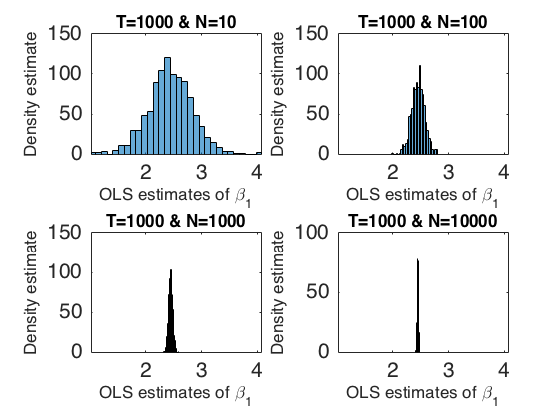

In [7]:
%Generate the histogram of the monte-carlo exercise

%This code will generate the historgrams by creating subplots
%to view all the distributions all in one display

%First, let's set the bins (how the data is grouped)
bins=30;

%Second, let's find the global minimum and the maximum across 
%all the sameple sizes to set the same axis across all 
%the subplots beta_sim_1 to more easily compare how the dispersion
%(shape of the bell curve) of the estimates change as N changes. 
%Since we have two dimensions we should use nested min and max 
%statements to get the global value.

x_axis_min = min(min(beta_sim_1));
x_axis_max = max(max(beta_sim_1));

%Finally, we run through a loop across the columns of beta_sim_1
%to generate a plot of the distribution of each column (so there 
%will be 4 subplots).

for i=1:size(N,1)

    subplot(2,2,i);
    histogram(beta_sim_1(:,i),bins)
    title(['T=1000 & N=' num2str(N(i))], 'FontSize',8)
    xlabel('OLS estimates of \beta_1','FontSize',8)
    ylabel('Density estimate', 'FontSize',8)
    xlim([x_axis_min x_axis_max])
    
end


As we suspected from the results of calculating the standard error of $\widehat{\beta}$, as the sample size increases the dispersion of the distribution of estimated $\widehat{\beta}$ decreases - it TIGHTENS (the estimates become MORE precise)!!

## Part II: Endogeneity through a Reduced Form Bias of a Confounding Variable

Here we will adjust the DGP from above to include a covariate (regressor) that is correlated with our regressor $x_{1,i}$ and the dependant variable. However, the econometrician misspecifies the model, attempting to estimate the model in the previuos section that is now a "reduced form" version (either out of naïvety or because he is missing the new variable in his dataset, or doesn't understand the confounsing mechanism).

In such cases we expect the Mean Squared Error (MSE) to be much larger than the previous values we have calculated - perhaps larger by several orders of magnitude. 

### Our data generating process

Our new DGP will consist of two regressors (independent variable). The DGP of our dependent variable $y$ is defined by the following:

\begin{align}
y_{i} &= \overbrace{15.5}^{\beta_{0}} + \overbrace{2.45}^{\beta_{1}}\cdot x_{1,i} + \overbrace{6}^{\beta_{2}}\cdot x_{2,i} + \varepsilon_{i} \\
x_{2,i} &= x_{1,i} + \nu_{i} \\
x_{1,i} &\sim \text{i.i.d. } \mathcal{U}(0,3)\\
\nu_{i}&\mid x_{1,i} \sim \text{i.i.d. }\mathcal{N}(0,2) \\
\varepsilon_{i}&\mid x_{1,i},x_{2,i} \sim \text{i.i.d. }\mathcal{N}(0,1)
\end{align}

The above implies that the "population" parameters are
\begin{equation}
\beta = 
\begin{bmatrix}
15.5 \\
2.45 \\
6
\end{bmatrix}
\end{equation}

The econometrician, however, mistakenly estimates the following reduced-form model, where $\beta_{1}$ will capture the information of $\beta_{2}$:

\begin{equation}
y_{i} = \beta_{0} + \beta_{1}\cdot x_{1,i} + \varepsilon_{i}
\end{equation}

We will now study the effect of this mistake. We will use a sample size of 100, and once again we will run 1000 simulations.

In [8]:
%Set the parameters of the population and initialize arrays

%Set the sample size:
sample_size = 100;

%Append to beta vector the new value for x_2:
beta = [beta;6];

%Initialize array (here we will store each beta in a column):
%Recall T=1000, so dim of Vector ->1000 sims x 2 parameters 
beta_sim2 = NaN(T,2);  

constant = ones(sample_size,1);

In [9]:
%The Monte-Carlo Cell

%Here we have only one loop since we are only doing this with
%one sample size.

tic
for i=1:T

    %program the regressors
    %x_1:
    x_1 = 3*rand(sample_size,1);
    %error term nu and x_2:
    nu = 2*randn(sample_size,1);
    x_2 = x_1 + nu;
    
    %create the data matrix for the dgp:
    X_dgp=[constant x_1 x_2];
    
    %generate the epsilon errors for Y:
    epsilon = randn(sample_size,1);
    
    %generate the dependent variable Y:
    Y = X_dgp*beta + epsilon;
    
    %estimate the incorrect model: 
    % y = beta_0 + beta_1*x_1 + epsilon
    
    X_err = X_dgp(:,1:2);
    
    %recall that (X'X)X'Y -> dim Kx1 for betas
    %But beta_sim2 is dim TxK => each row is
    %dim 1xK. So we take the transpose of (X'X)X'Y
    %to place this into beta_sim2
    beta_sim2(i,:) = ((X_err'*X_err)\X_err'*Y)';

end
toc

Elapsed time is 0.041638 seconds.


### Calculate the estimate of the coefficient parameter vector $\widehat{\beta}_{MC,2}$, the standard error $\widehat{SE}\left(\widehat{\beta}_{MC,2}\right)$, and the MSE 

Same as before, but this time we just take the mean of the array, since we have the two coefficients as each column, the mean will return a $1\times2$ vector where each column is the estimated coefficient (same for the and the standard error).

In [10]:
beta_hat_MC2 = mean(beta_sim2)
SE_MC2 = std(beta_sim2)

beta_hat_MC2 =

   15.4833    8.4388


SE_MC2 =

    2.5150    1.4961


The above shows that $\widehat{\beta}_{1}$ is very different from population $\beta_{1}=2.45$. We can calculate the MSE and then conduct a statistical test to see if $\widehat{\beta}_{MC,2}$=$\beta_{2}$.

In [11]:
%Calculate the MSE of the estimate of the parameter beta_1:

MSE_beta_1 = var(beta_sim2(:,2)) + (beta_hat_MC(2) - beta(2)).^2

MSE_beta_1 =

    2.2384


Recall that the Mean Squared Error of $\widehat{\beta}_{1}$ in part one for a sample size N=100 was $\approx0.013$. This MSE is now over $100$ times larger and we no longer have that $\text{E}\left(\widehat{\beta}_{1}\right)=\beta_{1}$.

So is our new estimate of $\widehat{\beta}_{MC,2}=8.44$ statistically equivalent to our population parameter of $\beta=2.45$ at a 95% confidence level, i.e. $\alpha=0.05$? We can conduct the following test:

\begin{equation}
\text{H}_{0}:\quad \widehat{\beta}_{1}=\beta_{1} \quad\quad\quad \text{H}_{a}:\quad \widehat{\beta}_{1}\neq\beta_{1}
\end{equation}

To do this we conduct a 2-sided t-test. We will ask matlab to give us the t-statistic for a distribution that we assume follows ours, and calculate the t value for our data to compare.

Since we will call upon this routine more than once, let's create a function to accomplish this test. It will take in as input the estimated parameter value, the value under the null hypothesis, the parameter standard error, the $\alpha$ of the test, and the sample size; it will send as an output a string regarding the result of the test, and the t values.

In [12]:
% The function takes on the form 
%[result,t_value,t_stat] = Sig_Test(beta_hat,beta_null,SE,alpha,SS)

%we can pick what we want to keep from the output. For example,
%if we only care about the result (whether the test was passed) we
%can keep just the output. Otherwise, we can keep all the values.

[result_MC2,t_value_MC2,t_stat] = Sig_Test(beta_hat_MC2(2),beta(2),...
                                           SE_MC2(2),0.05,sample_size)

result_MC2 =

Reject the null in favor of alternative: parameters not equal


t_value_MC2 =

    4.0029


t_stat =

    1.9842


The estimated parameter for $\widehat{\beta}_{1}\neq \beta_{1}$ according to our test.

### Plot the results from previous monte-carlo exercise (MC1) where sample size N=100, $\widehat{\beta}_{1,MC1}$,  with the current monte-carlo (MC2) misestimated $\widehat{\beta}_{1,MC2}$ in the same plot

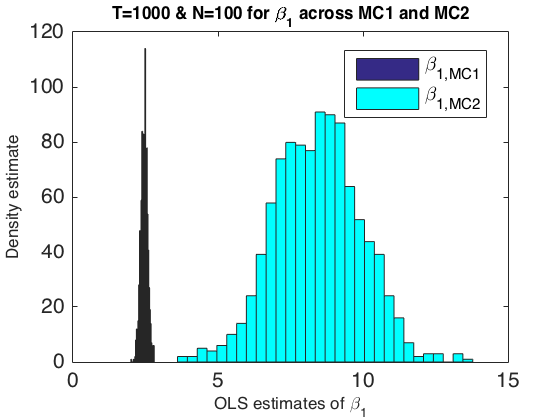

In [13]:
%Plot the histograms in the same graph

%generate a histogram object for the distribution from the 
%first part of the assignment -> recall that beta_sim_1(:,2)
%are the 1000 estimates of beta_1 where the sample size N=100
%(corresponding to column 2 of the array). Recall that bins=30
%was already set above so we don't have to redefine it.
[n,x_2_MC1] = hist(beta_sim_1(:,2),bins);

%generate the histogram object of this MC run, recalling that
%column 2 of beta_sim2 contains the 1000 estimates of beta_1.
[n2,x_2_MC2] = hist(beta_sim2(:,2),bins);

%call the bar graph on the first MC run. We will use the 'hold on' 
%command to tell matlab that we will be adding stuff to the graph, 
%in this case we will add the second histogram object as a second
%bar chart, but adding it to our plot as an object 'h' so that
%we can manipulate its color and such.
bar(x_2_MC1,n,'hist')
hold on; h=bar(x_2_MC2,n2,'hist'); hold off
set(h,'facecolor','c')

%set other plot elements:
title('T=1000 & N=100 for \beta_{1} across MC1 and MC2', 'FontSize',8)
xlabel('OLS estimates of \beta_1','FontSize',8)
ylabel('Density estimate', 'FontSize',8)
legend({'\beta_{1,MC1}','\beta_{1,MC2}'})

Notice how the two distributions, if they intersect, is barely perceptible. It is precisely for this reason that the previous hypothesis test rejected that the center of these distributions (the estimate of the respective $\widehat{\beta}_{1}$s) are statistically equivalent: the distributions do not overlap such that they are within either one of their critical regions.

## Part III: Direct Endogeneity of the Regressor (Introduction to 2SLS estimation - Instrumental Variables Regression)

In this exercies we will adjust the endogeneity problem so that instead of the regressor being endogenous to $\varepsilon$ through an ommited variable, it will be directly endogenous to the error term (perhaps, for example, becuase this variable has a selection bias).

As in the previous case, we cannot expect that any estimation of the parameter vector $\widehat{\beta}$ is un-biased. In the previous section it so happened that the bias of the ommited variable with which the regressor was itself correlated led to what we call an 'upward' bias (the estimated parameter of interest was larger than the true, population parameter because it was capturing a reduced-form relationship). In the case that follows we will see that the misspecification resulting from incorrectly assuming that the regressor is exogenous to the error term means that it will be 'downward' biased (the estimated parameter is smaller than the true value).

As we will see, what this means is that the following is now true (a bias results):

\begin{equation}
\text{p}\lim_{n\rightarrow \infty} \left(\widehat{\beta} - \beta \right) \neq 0 \quad\Rightarrow\quad \text{E}\left(\widehat{\beta}-\beta \right)\neq 0
\end{equation}

precisely because the following is the case $\text{E}\left(x_{1,i}\cdot \varepsilon_{i}\right)\neq0$, a violation of the exogeneity assumption of the linear model.

### Our data generating process

Our new DGP will consist of just the one regressor. The DGP of our dependent variable $y$ is defined by the following:

\begin{align}
y_{i} &= \overbrace{15.5}^{\beta_{0}} + \overbrace{2.45}^{\beta_{1}}\cdot x_{1,i} + \varepsilon_{i} \\
x_{1,i} &\sim \text{i.i.d. } \mathcal{U}(0,3)\\
\varepsilon_{i}\mid x_{1,i},x_{2,i} &\sim \text{i.i.d. }\mathcal{N}(0,1)
\end{align}

Our "population" parameters are thus given by:
\begin{equation}
\beta = 
\begin{bmatrix}
15.5 \\
2.45
\end{bmatrix}
\end{equation}

The econometrician, however, naïvely estimates the following model:

\begin{align}
y_{i} &= \beta_{0,endog} + \beta_{1,endog}\cdot x_{1,i}^{endog} + \varepsilon_{i} \\
x_{1,i}^{endog}&= x_{1,i} + \varepsilon_{i}
\end{align}

believing that $x_{1,i}=x_{1,i}^{endog}$ (thus he is unaware of the second process generating the endogeneity, assuming that $\text{E}\left(x_{1,i}^{endog}\cdot\varepsilon_{i}\right)=0$, which is not true). The estimates of this model we will call $\widehat{\beta}_{endog}$. 


Later, the econometrician realizes his mistaken assumption and "discovers" a new variable, $x_{3}$, that satsifies the two conditions to qualify it as an instrument: 

\begin{align}
\text{E}\left(x_{1,i}\cdot x_{3,i}\right)&\neq0\quad\text{correlated to regressor} \\
\text{E}\left(x_{3,i}\cdot \varepsilon_{i}\right)&=0\quad \text{uncorrelated to error}
\end{align}

He then implements the famous 2 Stage Least Squares regression on his naïve model to obtain an estimator of the parameters.


We will now study the effect of such a mistake and the correction, using a sample size of 100 and once again running 1000 simulations. To create the instrument, we define it as a random variable correlated with the regressor $x_{1,i}$ in the above DGP:

\begin{align}
x_{3,i} &= \rho\cdot x_{1,i} + \nu \\
\nu &\sim\text{i.i.d. } \mathcal{N}(0,1)
\end{align}
$\rho$ controls the "strength" of the instrument relative to the regressor $x_{1,i}$ (the higher $\rho$ is, the better it is in "breaking" the endogeneity). We will start with a $\rho=1$, and later you can play with this value to see how this affects the results.

### The 2-Stage Least Squares regressor

To accomplish the instrumental regression of the above misestimated model we conduct a 2-step regression (you will learn that this can be done much more efficiently later, but the 2-step approach makes it more clear):

1. Step 1: Regress the instrument on the regressor. We first estimate the following model to find the $\gamma$s: $
x_{1,i} = \gamma_{0} + \gamma_{1}\cdot x_{3,i} + \zeta_{i}$, where $\zeta_{i}$ is i.i.d. $\mathcal{N}(0,1)$
2. Next we find the vector of predicted values of $x_{1}$, $\widehat{x}_{1} = X_{step1}\cdot\gamma$.
3. Step 2: Regress the predicted value $\widehat{x}_{1,i}$ on $y$ in the above model instead of the regressor $x_{1,i}$ to generate the estimates that we will call $\widehat{\beta}_{IV}$: $y_{i} = \beta_{0,IV} + \beta_{1,IV}\cdot \widehat{x}_{1,i} + \varepsilon_{i}$

In [14]:
%Reset beta and initialize arrays (we keep other 
%variables as they are)

%Reset beta vector to original problem:
beta = beta(1:2);

%Initialize array (here we will store each beta in a column):
%Recall T=1000, so dim of Vector -> 1000 sims x 2 parameters 
beta_endog = NaN(T,2); 
beta_IV = NaN(T,2);

In [21]:
%Cell that runs the monte-carlo experiment

for i=1:T
    
    %generate the epsilon errors for Y and endog:
    epsilon = randn(sample_size,1);

    %create the true regressor:
    x_1 = 3*rand(sample_size,1);
    %and the endogenous regressor
    x_1_endog = x_1 + epsilon;
    
    %create the instrument:
    nu = randn(sample_size,1);
    rho = 1;
    x_3 = rho.*x_1 + nu;

    %create the data matrix for the dgp:
    X_dgp=[constant x_1];

    %generate the dependent variable Y:
    Y = X_dgp*beta + epsilon;

    %estimate the biased model: 
    % y = beta_0 + beta_1*x_1_endog + epsilon

    X_bias = [constant x_1_endog];

    %recall that (X'X)X'Y -> dim Kx1 for betas
    %But beta_misest is dim TxK => each row is
    %dim 1xK, corresponding to one run of the simulation. 
    %So we take the transpose of (X'X)X'Y
    %to place this into beta_misest
    beta_endog(i,:) = ((X_bias'*X_bias)\X_bias'*Y)';

    %2 - Stage Least Sqares regression

    %step 1: 
    %estimate the regression 
    %x_1 = gamma_0 + gamma_1 x_3 + zeta

    X_1step=[constant x_3];

    gamma = (X_1step'*X_1step)\X_1step'*x_1;

    %create the predicted values of x_1, x_1_hat:
    x_1_hat = X_1step*gamma;

    %step 2
    %use this predicted value of x_1_hat in the model

    X_2step=[constant x_1_hat];

    %estimate the betas:

    beta_IV(i,:) = ((X_2step'*X_2step)\X_2step'*Y)';

end

We can now look at the estimated results of the simulation and see what we obtain for $\widehat{\beta}_{endog}$ and $\widehat{\beta}_{IV}$. We will also conduct the test of significance to see if our regressor of interest differs from the population parameter.

In [16]:
beta_hat_endog = mean(beta_endog)
SE_endog = std(beta_endog)
beta_hat_IV = mean(beta_IV)
SE_IV = std(beta_IV)

beta_hat_endog =

   16.7439    1.6231


SE_endog =

    0.1371    0.0642


beta_hat_IV =

   15.5010    2.4482


SE_IV =

    0.2859    0.1745


As we can see, naïvely regressing an endogenous variable on the dependent variable generates a downward bias (in this case) when estimating the parameter of interst. However, using a variable that is exogenous to the error in the model but correlated to the endogenous regressor allows us to consistently estimate the parameter values. 

As you will learn, there is some loss in efficiency (in the estimation of the variance-covariance matrix and the standard error) when doing IV regressions. Here the standard error is slightly larger than the standard error in part one for the simulation of the true parameter variables when $N=100$. 

We will conduct the tests using the function that was created earlier to test the following:

\begin{align}
\text{H}_{0}:\quad \widehat{\beta}_{endog,1}=\beta_{1} \quad\quad\quad \text{H}_{a}:&\quad \widehat{\beta}_{endog,1}\neq\beta_{1} \\ 
\text{H}_{0}:\quad \widehat{\beta}_{IV,1}=\beta_{1}\quad\quad\quad \text{H}_{a}:&\quad \widehat{\beta}_{IV,1}\neq\beta_{1}
\end{align}

In [17]:
%calculate the t-statistic for our test:

%first test:
[result_endog,t_value_endog] = Sig_Test(beta_hat_endog(2),...
                               beta(2),SE_endog(2),0.05,sample_size)
[result_IV,t_value_IV] = Sig_Test(beta_hat_IV(2),beta(2),...
                               SE_IV(2),0.05,sample_size)

result_endog =

Reject the null in favor of alternative: parameters not equal


t_value_endog =

  -12.8851


result_IV =

Fail to reject the null in favor of alternative: parameters statistically equal


t_value_IV =

   -0.0103


The results indicate that the endogenous regressor is statisitically different from the true value at the 95% confidence level; while we failed to reject the null hypothesis that the IV estimator is different.

We can plot the results of the monte-carlo exercise to visualize the results. Here we will graph three histograms: 
1. using the results of $\widehat{\beta}_{1}$ from part 1 with $N=100$ as the distribution of our "true" population value of $\beta_{1}$;
2. the histrgrams of $\widehat{\beta}_{endog,1}$ and $\widehat{\beta}_{IV,1}$ for the results from this section

When graphing these, we have to be careful in what order we tell Matlab to graph them. Because the standard error of $\widehat{\beta}_{IV,1}$ is greater than that of $\widehat{\beta}_{1}$ from part 1, the variance is larger and so it is more widely dispersed. So we should tell Matlab to plot the IV estimates before we plot the estimates that make up the "true" distribution (the $\widehat{\beta}_{1}$ from part 1); otherwise the distribution of $\widehat{\beta}_{IV,1}$ will "block" from our view the results of the "true" distribution from part 1. 

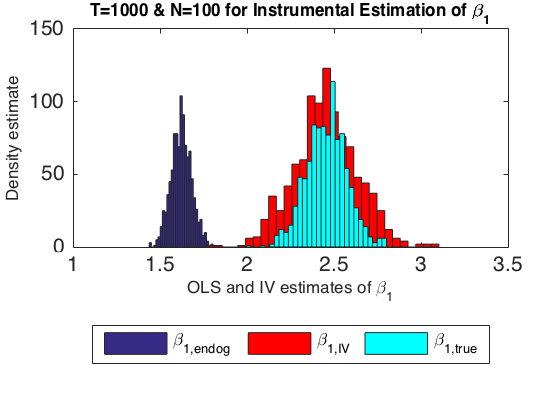

In [22]:

%generate a histogram object for the distribution from the 
%first part of the assignment -> recall that beta_sim_1(:,2)
%are the 1000 estimates of beta_1 where the sample size N=100
%(corresponding to column 2 of the array). Recall that bins=30
%was already set above so we don't have to redefine it.
[n,x_1_true] = hist(beta_sim_1(:,2),bins);

%generate the histogram object of this MC run, recalling that
%column 2 of beta_endog and beta_IV contains the 1000 estimates 
%of our parameter of interest, beta_1.
[n2,x_1_endog] = hist(beta_endog(:,2),bins);

[n3,x_1_IV] = hist(beta_IV(:,2),bins);

%call the bar graph on the first MC run. We will use the 'hold on' 
%command to tell matlab that we will be adding stuff to the graph, 
%in this case we will add the second and third histogram objects 
%as a second and third bar chart, but adding it to our plot as an 
%object 'h' so that we can manipulate its color and other things
%as needed.
bar(x_1_endog,n2,'hist')
hold on; h=bar(x_1_IV,n3,'hist'); hold off
set(h,'facecolor','r') 
hold on; h2=bar(x_1_true,n,'hist'); hold off
set(h2,'facecolor','c') 

%set other plot elements:
title('T=1000 & N=100 for Instrumental Estimation of \beta_1',...
      'FontSize',8)
xlabel('OLS and IV estimates of \beta_1','FontSize',8)
ylabel('Density estimate', 'FontSize',8)

%for the legend, we will need to resize it. So we call upon its
%objects to manipulate them -> we want to adjust font size
[hleg1, hobj1] = legend({'\beta_{1,endog}','\beta_{1,IV}',...
                '\beta_{1,true}'},'Location','southoutside',...
                'Orientation','horizontal');
textobj = findobj(hobj1, 'type', 'text');
set(textobj,'fontsize', 8);

The chart above displays the results: the "true" distribution lies ontop of the estimated results from the IV monte-carlo experiment (as we would expect given the results of our t-test indicates that the mean values of $\widehat{\beta}_{IV,1}$ and $\widehat{\beta}_{1}$ are statistically equivalent); however, the IV estimates are more dispersed (greater variance) than the "true" population. 

Play around with the parameter $\rho$ above and/or the definition of the distribution of the error term associated with the instrument to see how this affects the distribution of the IV parameters in the monte-carlo experiment (the estimation of the parameter will be consistent, but the variance of the distribution and the standard errors, etc. ?).